# Classical Multidimensional Scaling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances
import numpy as np
from  sklearn.manifold import MDS
from matplotlib.ticker import PercentFormatter

sns.set_style("whitegrid")

In [2]:
X = pd.read_csv("./data/X.csv", header=None)
X.head()

,0,1,2,3
0,-1.8792,5.9932,-1.6003,0.9285
1,-2.5856,7.5326,-0.5100,1.1351
2,-4.7000,5.2303,-0.2606,0.9775
3,-3.5637,6.3714,0.7119,0.9411
4,-2.5546,5.7744,-1.1941,0.9706


The matrix X has 4 columns, and therefore would be best visualized using 4 dimensions. We will use multidimensional scaling to visualize the data using fewer dimensions, while retaining most of the information it contains.
To perform multidimensional scaling, we must first calculate the pairwise distances between observations. We can use the [pairwise_distances()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html#sklearn-metrics-pairwise-distances) function to calculate these distances.

In [3]:
D = pairwise_distances(X)

The [MDS()](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html#sklearn-manifold-mds) class finds a configuration matrix for a set of pairwise distances. We can also obtain the eigenvalues.

In [4]:
embedding = MDS(normalized_stress='auto', dissimilarity="precomputed", n_components=4, random_state=0)
Y = embedding.fit_transform(D)
eigenvalues, _ = np.linalg.eig(Y.dot(Y.T))

We can use create a Pareto chart, which visualizes relative magnitudes of a vector in descending order.

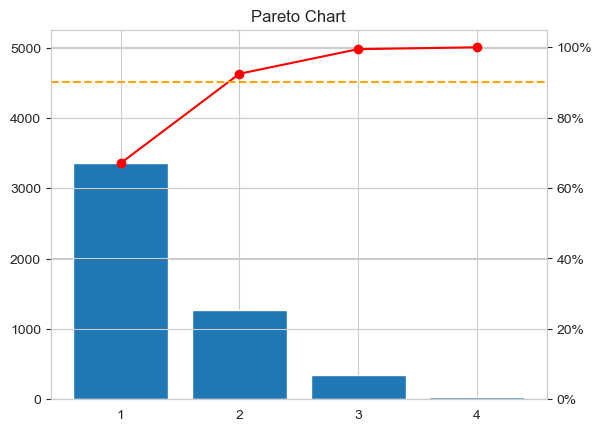

In [5]:
# Set figure and axis
fig, ax = plt.subplots()

# Plot bars (i.e. frequencies)
ax.bar(np.arange(1, 5), eigenvalues[:4].real)
ax.set_ylim(0, eigenvalues.real.sum()*1.05)
ax.set_title("Pareto Chart")
ax.set_xticks(np.arange(1, 5))

# Second y axis (i.e. cumulative percentage)
ax2 = ax.twinx()
ax2.plot(np.arange(1, 5), (eigenvalues[:4].real / eigenvalues.real.sum() * 100).cumsum(), color="red", marker="o")
ax2.axhline(90, color="orange", linestyle="dashed")
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylim(0, 100*1.05)

plt.show()

From the Pareto chart, we can see that over 90% of the distribution is described with just two variables. We can use the [scatter()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib-pyplot-scatter) function to create a scatter plot of the first two columns of the matrix Y.

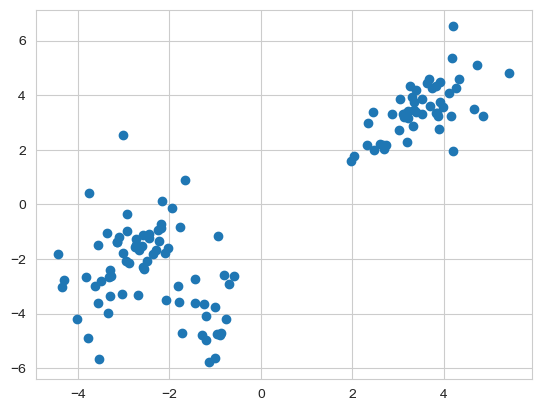

In [6]:
plt.figure()
plt.scatter(Y[:, 0], Y[:, 1])
plt.show()

From the Pareto chart, notice that almost 100% of the distribution is described with three variables.
We can create a three-dimensional scatter plot.

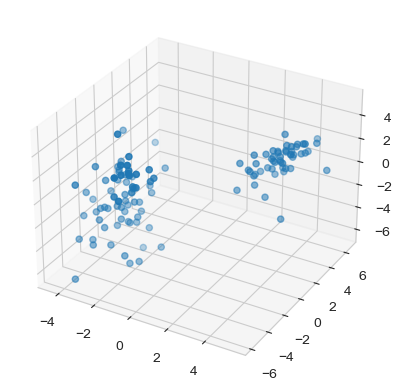

In [7]:
fig = plt.figure()

ax = fig.add_subplot(projection='3d')
ax.scatter(Y[:, 0], Y[:, 1], Y[:, 2])

plt.show()